<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/Exam1Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam 1 Solutions

In [ ]:
import requests
import pandas as pa
from bs4 import BeautifulSoup


r = requests.get('https://en.wikipedia.org/wiki/List of mountains by elevation')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
tables = html_soup.find_all('table',class_="wikitable")

df = pa.read_html(str(tables))[0]

df.head()

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal


In [ ]:
df.query('Range == "Himalayas"')

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


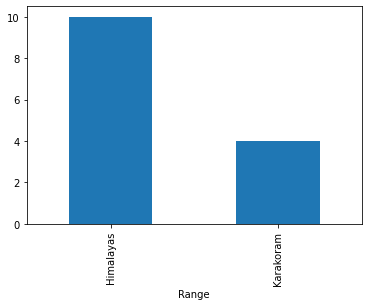

In [ ]:
df.groupby('Range')['Range'].count().plot(kind= 'bar')

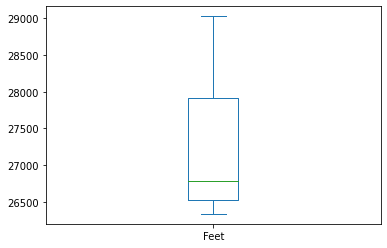

In [ ]:
df.Feet.plot(kind='box')

In [ ]:
df.Feet.describe()

count       14.000000
mean     27178.000000
std        879.489537
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29029.000000
Name: Feet, dtype: float64

In [ ]:
df.groupby('Range').agg(['mean','max','std'])

Metres                       Feet                   
              mean   max         std     mean    max         std
Range                                                           
Himalayas  8319.70  8848  270.100413  27295.6  29029  886.239521
Karakoram  8194.25  8611  278.456909  26884.0  28251  913.363382

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
%%bigquery --project pic-math
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,total_rows
0,198792903


In [ ]:
%%bigquery --project pic-math
SELECT payment_type, AVG(trip_total) as avg_trip_total, COUNT(*) as total_num_of_trips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY payment_type
ORDER BY avg_trip_total DESC

,payment_type,avg_trip_total,total_num_of_trips
0,Prepaid,22.377662,1805
1,Credit Card,20.524892,80421932
2,Mobile,20.339910,698557
3,Prcard,20.320682,955795
4,Split,18.788039,3442
5,Unknown,17.649893,932066
6,Way2ride,16.639366,142
7,No Charge,15.836177,817699
8,Dispute,15.496588,83309
9,Cash,12.265548,114841282


In [ ]:
%%bigquery --project pic-math

SELECT COUNT(*) as num_trips_over_average_time
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` as s
WHERE s.trip_seconds > (SELECT AVG(trip_seconds) as avg_trip_seconds
                        FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                        WHERE trip_seconds >0)

,num_trips_over_average_time
0,60750508
